<a href="https://colab.research.google.com/github/mehular0ra/Bias_in_google_image_search/blob/main/Algorithm%20and%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sheet_id = "1pIAWqylNQT0VIc0ItjWpSp0myuJ2CmlygC6GWSPm5KM"
sheet_name_1 = "set-1"
sheet_name_2 = "set-2"
sheet_name_3 = "set-3"

sheet1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_1}"
sheet2 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_2}"
sheet3 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_3}"

In [3]:
# covert to dataframes
df1 = pd.read_csv(sheet1)
df2 = pd.read_csv(sheet2)
df3 = pd.read_csv(sheet3)

In [4]:
# covert data into dict format with each column as a list
dict1 = df1.to_dict(orient='list')
dict2 = df2.to_dict(orient='list')
dict3 = df3.to_dict(orient='list')

# print(dict1)

In [5]:
print(dict2['software_developer'])

[-1, 1, 0, -1, -1, 0, -1, 1, -1, -1, -1, -1, 0, -1, 1, -1, 1, -1, 0, 0, 0, -1, -1, 1, -1, 1, -1, -1, 1, -1]


In [6]:
# combining the 3 dictionaries into 1 combine_dict
combine_dict = {}
for key in dict1:
    combine_dict[key] = [(dict1[key][val] + dict2[key][val] + dict3[key][val])/3 for val in range(30)]

print(combine_dict)

{'data_scientist': [-0.6666666666666666, -0.6666666666666666, -0.6666666666666666, 0.0, 0.0, -0.6666666666666666, 0.3333333333333333, -0.3333333333333333, -1.0, -0.3333333333333333, -0.3333333333333333, 0.3333333333333333, 0.0, -0.6666666666666666, 0.0, 0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.6666666666666666, 0.3333333333333333, -0.6666666666666666, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.6666666666666666], 'software_developer': [-0.3333333333333333, 0.3333333333333333, 0.0, -1.0, -0.6666666666666666, -0.6666666666666666, -0.6666666666666666, 0.3333333333333333, -0.6666666666666666, 0.0, -1.0, -1.0, 0.0, -0.3333333333333333, 0.6666666666666666, -0.3333333333333333, 0.3333333333333333, 0.3333333333333333, -0.6666666666666666, -0.6666666666666666, 0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0,

In [7]:
# calculate input bias for every term, and save them to dictionary 'ib'
ib = {}
for key, value in combine_dict.items():
    ib[key] = sum(value)/30

# output bias
ob = {}
for key, value in combine_dict.items():
    keyword_lst = combine_dict[key]
    tsum = 0
    b = 0
    for i in range(30):
        tsum += keyword_lst[i]
        b += tsum / (i+1)
    ob[key] = b / 30

# ranking bias
rb = {}
for key, value in ob.items():
    rb[key] = ob[key] - ib[key]

In [50]:
for key, val in rb.items():
    print(f'{key}')

data_scientist
software_developer
information_security_analyst
computer_systems_analyst
web_developer
computer_research_scientist
network_and_systems_administrator
tech_entrepreneur
sales_engineer
information_technology_manager
pharmacist
nurse_practitioner
veterinarian
physician_assistant
occupational_therapist
dental_hygienist
dietitian_and_nutritionist
administrative_assistant
hairdresser_hair_stylist
speech_language_pathologist


In [8]:
# google ranking algorithm bias (internal)
for key, val in rb.items():
    print(f'{key}:                     {val:.4f}')

data_scientist:                     -0.1697
software_developer:                     -0.0408
information_security_analyst:                     -0.1276
computer_systems_analyst:                     -0.1182
web_developer:                     -0.1296
computer_research_scientist:                     -0.1259
network_and_systems_administrator:                     -0.1069
tech_entrepreneur:                     -0.0760
sales_engineer:                     -0.1493
information_technology_manager:                     -0.1445
pharmacist:                     -0.0337
nurse_practitioner:                     0.0101
veterinarian:                     0.1094
physician_assistant:                     -0.0594
occupational_therapist:                     -0.0585
dental_hygienist:                     -0.1382
dietitian_and_nutritionist:                     -0.0438
administrative_assistant:                     -0.0825
hairdresser_hair_stylist:                     -0.0788
speech_language_pathologist:               

In [9]:
# input bias (total number of bias: either male or female overall)
for key, val in ib.items():
    print(f'{key}:                     {val:.4f}')

data_scientist:                     -0.1778
software_developer:                     -0.2556
information_security_analyst:                     -0.2889
computer_systems_analyst:                     -0.1000
web_developer:                     -0.1222
computer_research_scientist:                     -0.1000
network_and_systems_administrator:                     -0.4778
tech_entrepreneur:                     -0.3778
sales_engineer:                     -0.3111
information_technology_manager:                     -0.0667
pharmacist:                     0.2000
nurse_practitioner:                     0.7333
veterinarian:                     0.3778
physician_assistant:                     0.3000
occupational_therapist:                     0.3333
dental_hygienist:                     0.5222
dietitian_and_nutritionist:                     0.3333
administrative_assistant:                     0.2111
hairdresser_hair_stylist:                     0.3222
speech_language_pathologist:                     0

In [10]:
# output bias (the bias we see)
for key, val in ob.items():
    print(f'{key}:                     {val:.4f}')

data_scientist:                     -0.3475
software_developer:                     -0.2963
information_security_analyst:                     -0.4165
computer_systems_analyst:                     -0.2182
web_developer:                     -0.2518
computer_research_scientist:                     -0.2259
network_and_systems_administrator:                     -0.5847
tech_entrepreneur:                     -0.4538
sales_engineer:                     -0.4604
information_technology_manager:                     -0.2112
pharmacist:                     0.1663
nurse_practitioner:                     0.7434
veterinarian:                     0.4871
physician_assistant:                     0.2406
occupational_therapist:                     0.2748
dental_hygienist:                     0.3840
dietitian_and_nutritionist:                     0.2896
administrative_assistant:                     0.1286
hairdresser_hair_stylist:                     0.2435
speech_language_pathologist:                     0

**Data Visualisation**

In [11]:
import numpy as np 

In [12]:
plt.style.use("seaborn")

**Multiple Bar Graph**

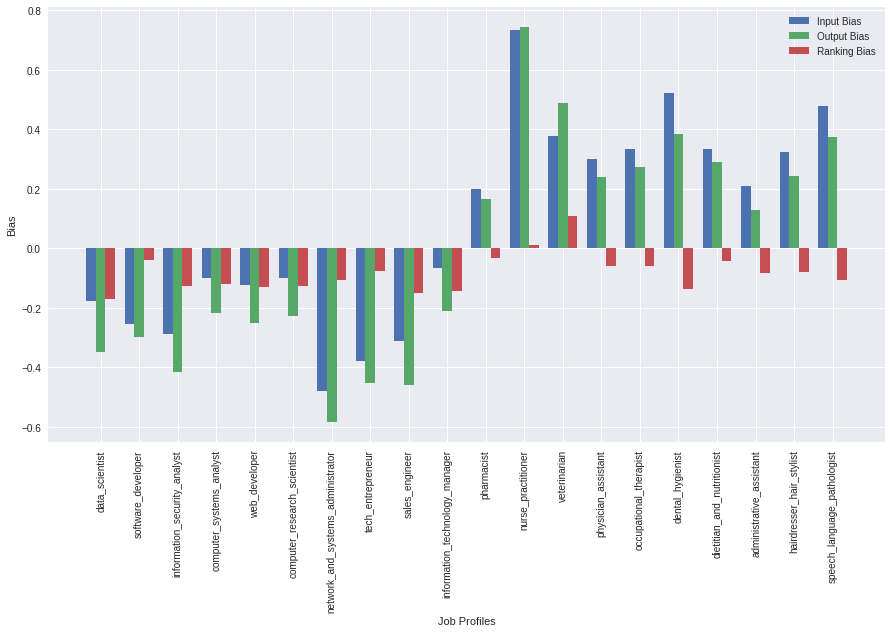

In [13]:
# Creating a multiple bar graph with job profiles on the x-axis and ib, ob and rb on the y axis

x = np.arange(0,40,2)
plt.figure(figsize = (15,8))
plt.bar(x,list(ib.values()), width = 0.5, label = "Input Bias")
plt.bar(x+0.5,list(ob.values()), width = 0.5, label = "Output Bias",tick_label = list(rb.keys()))
plt.bar(x+1,list(rb.values()), width = 0.5, label = "Ranking Bias")
plt.xticks(rotation = 90)
plt.xlabel("Job Profiles")
plt.ylabel("Bias")
plt.legend()
plt.show()

**Comparision of Ranking Bias in Male and Female Dominated jobs (Simple Bar Graph)**

In [14]:
# Calculating the total Ranking bias in male dominated jobs (first 10) and female dominated jobs(last 10)

rb_male_jobs = abs(sum(list(rb.values())[0:10]))
rb_female_jobs = abs(sum(list(rb.values())[10:20]))

print(rb_male_jobs, rb_female_jobs)

1.1884624303036606 0.4802138902283399


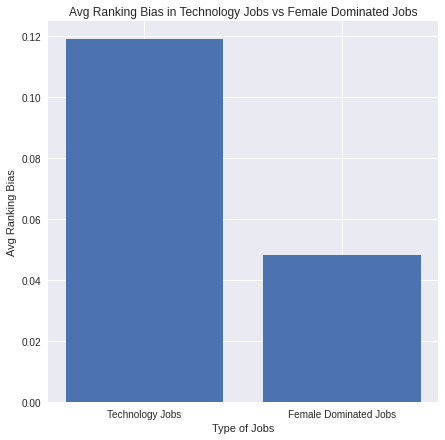

In [53]:
# Creating a bar chart for comparing the avg ranking bias in male dominated jobs and female dominated jobs

plt.figure(figsize = (7,7))
plt.bar([1,2],[rb_male_jobs/10, rb_female_jobs/10], tick_label = ["Technology Jobs","Female Dominated Jobs"])
plt.xlabel("Type of Jobs")
plt.ylabel("Avg Ranking Bias")
plt.title("Avg Ranking Bias in Technology Jobs vs Female Dominated Jobs")
plt.show()

# Conclusion: Avg Ranking Bias in male dominated jobs is almost double the Avg Ranking Bias in femlae dominated jobs.

**Composition of Output Bias in male dominated jobs (Pie Chart)**

In [16]:
# Calculating the total Output and Input bias in male dominated jobs

ob_male_jobs = abs(sum(list(ob.values())[0:10]))
ib_male_jobs = abs(sum(list(ib.values())[0:10]))

print(ob_male_jobs,ib_male_jobs,rb_male_jobs)

3.466240208081438 2.2777777777777777 1.1884624303036606


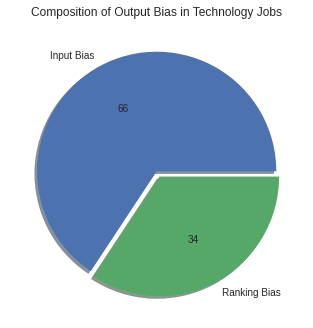

In [52]:
# Creating a pie chart with the total as the Output bias in male dominated jobs to see what proportion of it is contributed by the input bias and how much
# is contributed by the ranking bias

plt.pie([ib_male_jobs, rb_male_jobs],explode=[0,0.05],labels = ["Input Bias", "Ranking Bias"], autopct = "%0.0f", shadow = True)
plt.title("Composition of Output Bias in Technology Jobs")
plt.show()

# Conclusion: Out of the total output bias against women in male dominated jobs, 34% is contributed by the ranking bias.

**Percentage effect of Ranking Bias on Input Bias in Female Dominated jobs(Pie Chart)**

In [18]:
# Calculating the total output and input bias in female dominated jobs

ob_female_jobs = abs(sum(list(ob.values())[10:20]))
ib_female_jobs = abs(sum(list(ib.values())[10:20]))
print(ob_female_jobs,ib_female_jobs,rb_female_jobs)

3.330897220882771 3.8111111111111113 0.4802138902283399


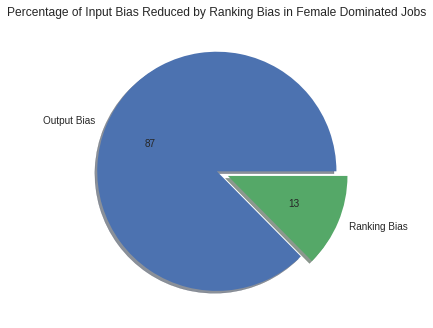

In [19]:
# Creating a pie chart to see what percentage of the initial input bias in the favour of women is reduced by the ranking bias

plt.pie([ob_female_jobs, rb_female_jobs],explode=[0,0.1],labels = ["Output Bias", "Ranking Bias"], autopct = "%0.0f", shadow = True)
plt.title("Percentage of Input Bias Reduced by Ranking Bias in Female Dominated Jobs")
plt.show()

# Conclusion: The input bias in favour of women in female dominated jobs is reduced by 13% by the ranking bias.

**Comparision of Ranking Bias in High input bias and low input bias jobs (Bar Graph)**

In [20]:
# Copying the input bias values into a numpy array, same for ranking bias
ib_vals = np.fromiter(ib.values(),dtype = float)
rb_vals = np.fromiter(rb.values(),dtype = float)
print(ib_vals, rb_vals)

[-0.17777778 -0.25555556 -0.28888889 -0.1        -0.12222222 -0.1
 -0.47777778 -0.37777778 -0.31111111 -0.06666667  0.2         0.73333333
  0.37777778  0.3         0.33333333  0.52222222  0.33333333  0.21111111
  0.32222222  0.47777778] [-0.16968338 -0.04077039 -0.12761047 -0.11818189 -0.12958993 -0.12594024
 -0.10691156 -0.07597566 -0.14931512 -0.14448379 -0.03370238  0.01008434
  0.10935215 -0.05937918 -0.05848797 -0.13819704 -0.04378304 -0.08252461
 -0.07876495 -0.10481121]


In [21]:
# Finidng out the indices at which the input bias is higher than and lesser that 0.3(abs val)

high_ib_idx = np.where(abs(ib_vals) >= 0.3)
low_ib_idx = np.where(abs(ib_vals) < 0.3)
print(high_ib_idx, low_ib_idx)

(array([ 6,  7,  8, 11, 12, 14, 15, 16, 18, 19]),) (array([ 0,  1,  2,  3,  4,  5,  9, 10, 13, 17]),)


In [22]:
# First Calculating total ranking bias for those indices(ie job profiles) where input bias(abs val) is more than 0.3 and then calculating the total ranking
# bias for those indices(ie job profiles) where the input bias(abs val) is less than 0.3 to see if there is a relation between input bias and ranking bias

high_ib_rb = 0
for index in high_ib_idx:
  high_ib_rb += rb_vals[index]
high_ib_rb = sum(abs(high_ib_rb))/10
print(high_ib_rb)

low_ib_rb = 0
for index in low_ib_idx:
  low_ib_rb += rb_vals[index]
low_ib_rb = sum(abs(low_ib_rb))/10
print(low_ib_rb)

0.08756830528884944
0.1031866255968685


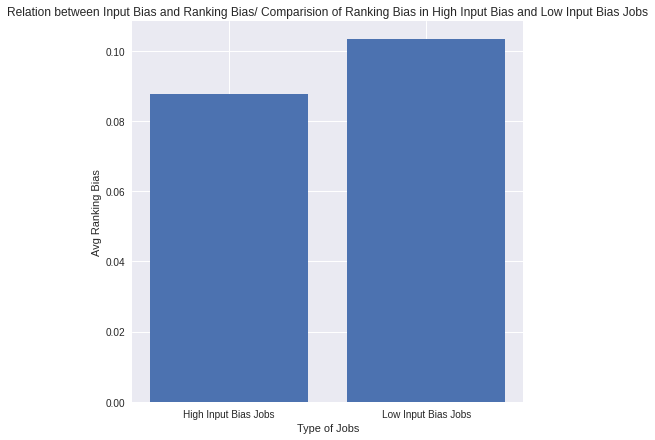

In [23]:
plt.figure(figsize = (7,7))
plt.bar([1,2],[high_ib_rb, low_ib_rb], tick_label = ["High Input Bias Jobs","Low Input Bias Jobs"])
plt.xlabel("Type of Jobs")
plt.ylabel("Avg Ranking Bias")
plt.title("Relation between Input Bias and Ranking Bias/ Comparision of Ranking Bias in High Input Bias and Low Input Bias Jobs")
plt.show()

# Conclusion: On an average, jobs with high input bias have a low ranking bias and vice-versa. So, there is low degree of inverse relation between input
# bias and ranking bias

In [24]:
ib_vals_m = ib_vals[0:10]
rb_vals_m = rb_vals[0:10]
print(ib_vals_m, rb_vals_m)

[-0.17777778 -0.25555556 -0.28888889 -0.1        -0.12222222 -0.1
 -0.47777778 -0.37777778 -0.31111111 -0.06666667] [-0.16968338 -0.04077039 -0.12761047 -0.11818189 -0.12958993 -0.12594024
 -0.10691156 -0.07597566 -0.14931512 -0.14448379]


In [25]:
high_ib_idx_m = np.where(abs(ib_vals_m) >= 0.3)
low_ib_idx_m = np.where(abs(ib_vals_m) < 0.3)
print(high_ib_idx_m, low_ib_idx_m)

(array([6, 7, 8]),) (array([0, 1, 2, 3, 4, 5, 9]),)


In [26]:
high_ib_rb_m = 0
for index in high_ib_idx_m:
  high_ib_rb_m += rb_vals_m[index]
high_ib_rb_m = sum(abs(high_ib_rb_m))/3
print(high_ib_rb_m)

low_ib_rb_m = 0
for index in low_ib_idx_m:
  low_ib_rb_m += rb_vals_m[index]
low_ib_rb_m = sum(abs(low_ib_rb_m))/7
print(low_ib_rb_m)

0.11073411329122453
0.1223228700614267


In [27]:
ib_vals_f = ib_vals[10:20]
rb_vals_f = rb_vals[10:20]
print(ib_vals_f, rb_vals_f)

[0.2        0.73333333 0.37777778 0.3        0.33333333 0.52222222
 0.33333333 0.21111111 0.32222222 0.47777778] [-0.03370238  0.01008434  0.10935215 -0.05937918 -0.05848797 -0.13819704
 -0.04378304 -0.08252461 -0.07876495 -0.10481121]


In [28]:
high_ib_idx_f = np.where(abs(ib_vals_f) >= 0.3)
low_ib_idx_f = np.where(abs(ib_vals_f) < 0.3)
print(high_ib_idx_f, low_ib_idx_f)

(array([1, 2, 4, 5, 6, 8, 9]),) (array([0, 3, 7]),)


In [29]:
high_ib_rb_f = 0
for index in high_ib_idx_f:
  high_ib_rb_f += rb_vals_f[index]
high_ib_rb_f = sum(abs(high_ib_rb_f))/7
print(high_ib_rb_f)

low_ib_rb_f = 0
for index in low_ib_idx_f:
  low_ib_rb_f += rb_vals_f[index]
low_ib_rb_f = sum(abs(low_ib_rb_f))/3
print(low_ib_rb_f)

0.07764010185926014
0.05853538851289939


In [30]:
ib_vals_abs = np.abs(ib_vals)
ib_vals_sorted = np.sort(ib_vals_abs)
print(ib_vals,ib_vals_abs,ib_vals_sorted)

[-0.17777778 -0.25555556 -0.28888889 -0.1        -0.12222222 -0.1
 -0.47777778 -0.37777778 -0.31111111 -0.06666667  0.2         0.73333333
  0.37777778  0.3         0.33333333  0.52222222  0.33333333  0.21111111
  0.32222222  0.47777778] [0.17777778 0.25555556 0.28888889 0.1        0.12222222 0.1
 0.47777778 0.37777778 0.31111111 0.06666667 0.2        0.73333333
 0.37777778 0.3        0.33333333 0.52222222 0.33333333 0.21111111
 0.32222222 0.47777778] [0.06666667 0.1        0.1        0.12222222 0.17777778 0.2
 0.21111111 0.25555556 0.28888889 0.3        0.31111111 0.32222222
 0.33333333 0.33333333 0.37777778 0.37777778 0.47777778 0.47777778
 0.52222222 0.73333333]


In [31]:
p_20 = ib_vals_sorted[int(len(ib_vals_sorted)/5)-1]
p_80 = ib_vals_sorted[int(4*len(ib_vals_sorted)/5)]

print(p_20, p_80)

0.12222222222222225 0.47777777777777775


In [32]:
high_ib_indx = np.where(abs(ib_vals) >= p_80)
low_ib_indx = np.where(abs(ib_vals) <= p_20)

print(high_ib_indx, low_ib_indx)

(array([ 6, 11, 15, 19]),) (array([3, 4, 5, 9]),)


In [33]:
high_ib_rb = 0
for index in high_ib_indx:
  high_ib_rb += rb_vals[index]
high_ib_rb = sum(abs(high_ib_rb))/4
print(high_ib_rb)

low_ib_rb = 0
for index in low_ib_indx:
  low_ib_rb += rb_vals[index]
low_ib_rb = sum(abs(low_ib_rb))/4
print(low_ib_rb)

0.09000103961903519
0.12954896225827978


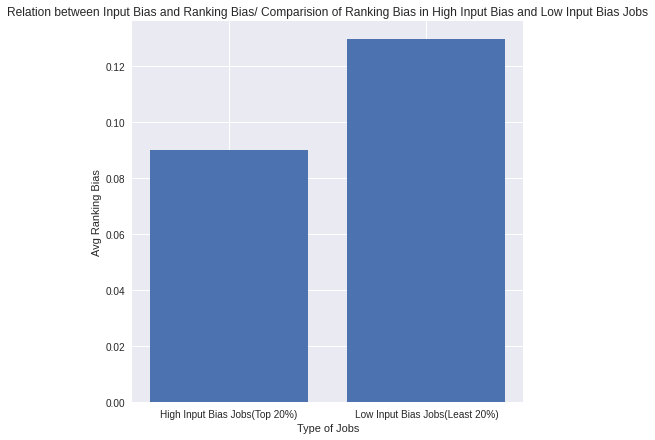

In [34]:
plt.figure(figsize = (7,7))
plt.bar([1,2],[high_ib_rb, low_ib_rb], tick_label = ["High Input Bias Jobs(Top 20%)","Low Input Bias Jobs(Least 20%)"])
plt.xlabel("Type of Jobs")
plt.ylabel("Avg Ranking Bias")
plt.title("Relation between Input Bias and Ranking Bias/ Comparision of Ranking Bias in High Input Bias and Low Input Bias Jobs")
plt.show()


In [35]:
ib_df = pd.DataFrame.from_dict(ib.items())
ib_df.columns = ["Job Profile", "Input Bias"]
ib_df

,Job Profile,Input Bias
0,data_scientist,-0.177778
1,software_developer,-0.255556
2,information_security_analyst,-0.288889
3,computer_systems_analyst,-0.100000
4,web_developer,-0.122222
5,computer_research_scientist,-0.100000
6,network_and_systems_administrator,-0.477778
7,tech_entrepreneur,-0.377778
8,sales_engineer,-0.311111
9,information_technology_manager,-0.066667


In [36]:
ob_df = pd.DataFrame.from_dict(ob.items())
ob_df.columns = ["Job Profile", "Output Bias"]
ob_df

,Job Profile,Output Bias
0,data_scientist,-0.347461
1,software_developer,-0.296326
2,information_security_analyst,-0.416499
3,computer_systems_analyst,-0.218182
4,web_developer,-0.251812
5,computer_research_scientist,-0.225940
6,network_and_systems_administrator,-0.584689
7,tech_entrepreneur,-0.453753
8,sales_engineer,-0.460426
9,information_technology_manager,-0.211150


In [37]:
rb_df = pd.DataFrame.from_dict(rb.items())
rb_df.columns = ["Job Profile", "Ranking Bias"]
rb_df

,Job Profile,Ranking Bias
0,data_scientist,-0.169683
1,software_developer,-0.040770
2,information_security_analyst,-0.127610
3,computer_systems_analyst,-0.118182
4,web_developer,-0.129590
5,computer_research_scientist,-0.125940
6,network_and_systems_administrator,-0.106912
7,tech_entrepreneur,-0.075976
8,sales_engineer,-0.149315
9,information_technology_manager,-0.144484


In [38]:
class_dict = {}
for key in ib.keys():
  if key == ib_df["Job Profile"][6] or key == ib_df["Job Profile"][11] or key == ib_df["Job Profile"][15] or key == ib_df["Job Profile"][19] :
    print(key)
    class_dict[key]= "High Input Bias Job"
  elif key == ib_df["Job Profile"][3] or key == ib_df["Job Profile"][4] or key == ib_df["Job Profile"][5] or key == ib_df["Job Profile"][9] :
    print(key)
    class_dict[key] = "Low Input Bias Job"
  else:
    class_dict[key] = "Moderate Input Bias Job"

computer_systems_analyst
web_developer
computer_research_scientist
network_and_systems_administrator
information_technology_manager
nurse_practitioner
dental_hygienist
speech_language_pathologist


In [39]:
class_dict

{'administrative_assistant': 'Moderate Input Bias Job',
 'computer_research_scientist': 'Low Input Bias Job',
 'computer_systems_analyst': 'Low Input Bias Job',
 'data_scientist': 'Moderate Input Bias Job',
 'dental_hygienist': 'High Input Bias Job',
 'dietitian_and_nutritionist': 'Moderate Input Bias Job',
 'hairdresser_hair_stylist': 'Moderate Input Bias Job',
 'information_security_analyst': 'Moderate Input Bias Job',
 'information_technology_manager': 'Low Input Bias Job',
 'network_and_systems_administrator': 'High Input Bias Job',
 'nurse_practitioner': 'High Input Bias Job',
 'occupational_therapist': 'Moderate Input Bias Job',
 'pharmacist': 'Moderate Input Bias Job',
 'physician_assistant': 'Moderate Input Bias Job',
 'sales_engineer': 'Moderate Input Bias Job',
 'software_developer': 'Moderate Input Bias Job',
 'speech_language_pathologist': 'High Input Bias Job',
 'tech_entrepreneur': 'Moderate Input Bias Job',
 'veterinarian': 'Moderate Input Bias Job',
 'web_developer': 'L

In [40]:
class_df = pd.DataFrame.from_dict(class_dict.items())
class_df.columns = ["Job Profile", "Type of Job"]
class_df

,Job Profile,Type of Job
0,data_scientist,Moderate Input Bias Job
1,software_developer,Moderate Input Bias Job
2,information_security_analyst,Moderate Input Bias Job
3,computer_systems_analyst,Low Input Bias Job
4,web_developer,Low Input Bias Job
5,computer_research_scientist,Low Input Bias Job
6,network_and_systems_administrator,High Input Bias Job
7,tech_entrepreneur,Moderate Input Bias Job
8,sales_engineer,Moderate Input Bias Job
9,information_technology_manager,Low Input Bias Job


In [41]:
new_df = pd.concat([class_df["Type of Job"],ib_df["Input Bias"],rb_df["Ranking Bias"]], axis = 1)
new_df

,Type of Job,Input Bias,Ranking Bias
0,Moderate Input Bias Job,-0.177778,-0.169683
1,Moderate Input Bias Job,-0.255556,-0.040770
2,Moderate Input Bias Job,-0.288889,-0.127610
3,Low Input Bias Job,-0.100000,-0.118182
4,Low Input Bias Job,-0.122222,-0.129590
5,Low Input Bias Job,-0.100000,-0.125940
6,High Input Bias Job,-0.477778,-0.106912
7,Moderate Input Bias Job,-0.377778,-0.075976
8,Moderate Input Bias Job,-0.311111,-0.149315
9,Low Input Bias Job,-0.066667,-0.144484


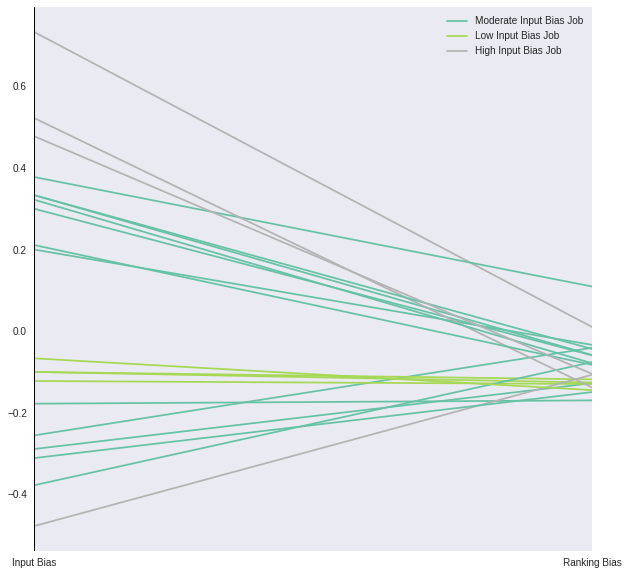

In [42]:
# libraries
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (10,10))
parallel_coordinates(new_df, 'Type of Job', colormap=plt.get_cmap("Set2"))
plt.show()

In [43]:
new_df["Input Bias"] = new_df["Input Bias"].apply(abs)
new_df["Ranking Bias"] = new_df["Ranking Bias"].apply(abs)
new_df

,Type of Job,Input Bias,Ranking Bias
0,Moderate Input Bias Job,0.177778,0.169683
1,Moderate Input Bias Job,0.255556,0.040770
2,Moderate Input Bias Job,0.288889,0.127610
3,Low Input Bias Job,0.100000,0.118182
4,Low Input Bias Job,0.122222,0.129590
5,Low Input Bias Job,0.100000,0.125940
6,High Input Bias Job,0.477778,0.106912
7,Moderate Input Bias Job,0.377778,0.075976
8,Moderate Input Bias Job,0.311111,0.149315
9,Low Input Bias Job,0.066667,0.144484


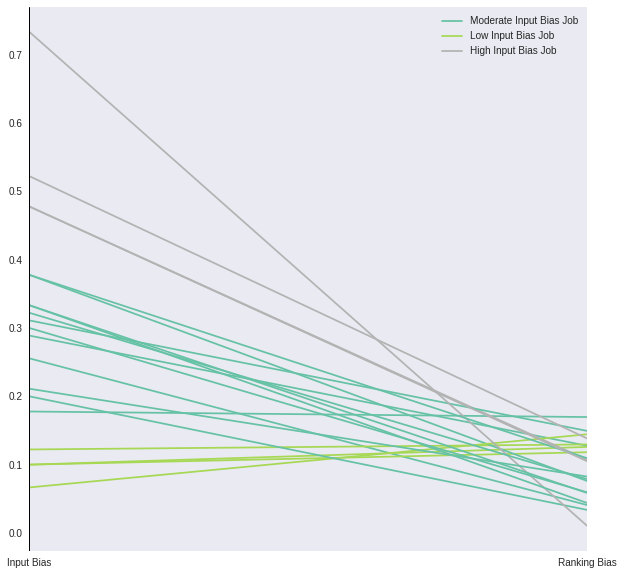

In [44]:
# libraries
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (10,10))
parallel_coordinates(new_df, 'Type of Job', colormap=plt.get_cmap("Set2"))
plt.show()